# Linear Regression

In [4]:
#!pip install numpy
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")

# Read Data Set

In [6]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


independent variables = feature = estimator = attribute = input 

dependent variables = target = label = output

rows: observation - samples


Features: TV - radio - newspaper

Target  : Sales

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [10]:
df.sample(5)

,TV,radio,newspaper,sales
100,222.4,4.3,49.8,11.7
167,206.8,5.2,19.4,12.2
95,163.3,31.6,52.9,16.9
131,265.2,2.9,43.0,12.7
123,123.1,34.6,12.4,15.2


In [11]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Correlation

In [12]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

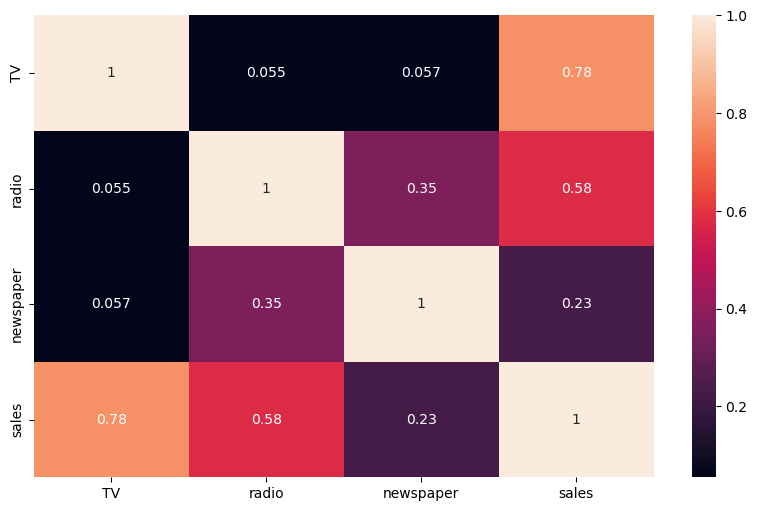

In [13]:
sns.heatmap(df.corr(), annot=True)

#### **What is multicollinearity?

**Multicollinearity** occurs when two or more independent variables in a regression model are highly correlated with each other.

- If there is multicollinearity, the features are highly correlated with each other.

- For example, C and F both tell us the same thing. the correlation between them is very high.

- We want the correlation of the features to be low among themselves and very high with the target var.

- We don't want multicollinearity, it causes overfitting.

## Create new independent variable.feature enginnering

In [14]:
df['total_spend'] = df.TV + df.radio + df.newspaper
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [15]:
df = df.iloc[:,[0,1,2,4,3]]
df

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9
...,...,...,...,...,...
195,38.2,3.7,13.8,55.7,7.6
196,94.2,4.9,8.1,107.2,9.7
197,177.0,9.3,6.4,192.7,12.8
198,283.6,42.0,66.2,391.8,25.5


In [16]:
#  pip install scipy

In [17]:
import scipy.stats as stats

## Which feature is more suitable for linear regression?

In [18]:
for i in df.drop(columns='sales'):
    print(f'corr between sales and {i}: {df.sales.corr(df[i])}')

corr between sales and TV: 0.7822244248616061
corr between sales and radio: 0.5762225745710551
corr between sales and newspaper: 0.22829902637616528
corr between sales and total_spend: 0.8677123027017427


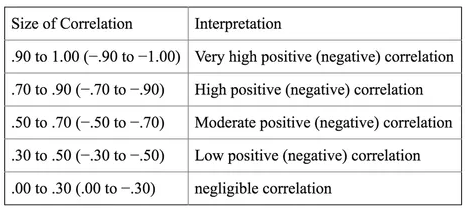

In [19]:
df = df[['total_spend', 'sales']]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


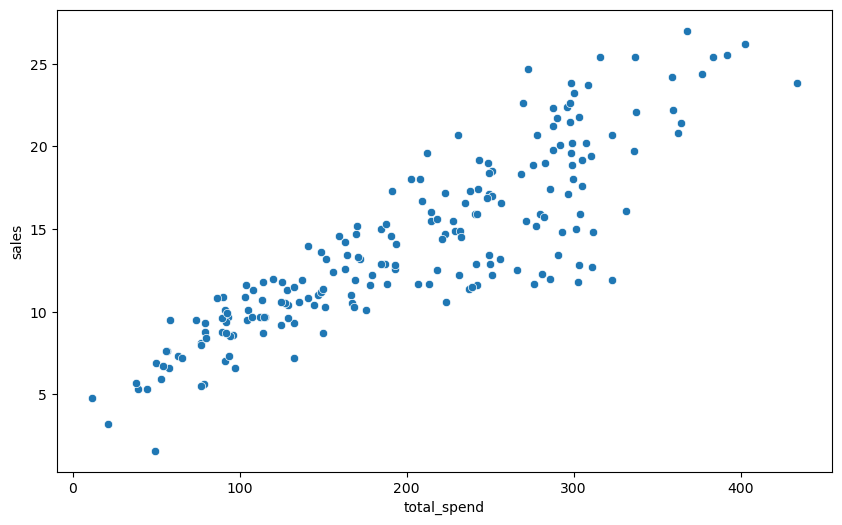

In [20]:
sns.scatterplot(data=df, x='total_spend', y='sales');

## Correlation between independent variable and dependent variable 

In [21]:
corr = df.sales.corr(df.total_spend)
corr

0.8677123027017427

In [22]:
df.corr()

,total_spend,sales
total_spend,1.000000,0.867712
sales,0.867712,1.000000


## Coefficant of determination (R2)

In [23]:
# Works only in simple linear regression models, for other models we will use 
# Scikit learn library instead
R2_score = corr**2
R2_score

# total_spend describes 75% of the change in the sales

0.7529246402599608

# Linear Regression

<Axes: xlabel='total_spend', ylabel='sales'>

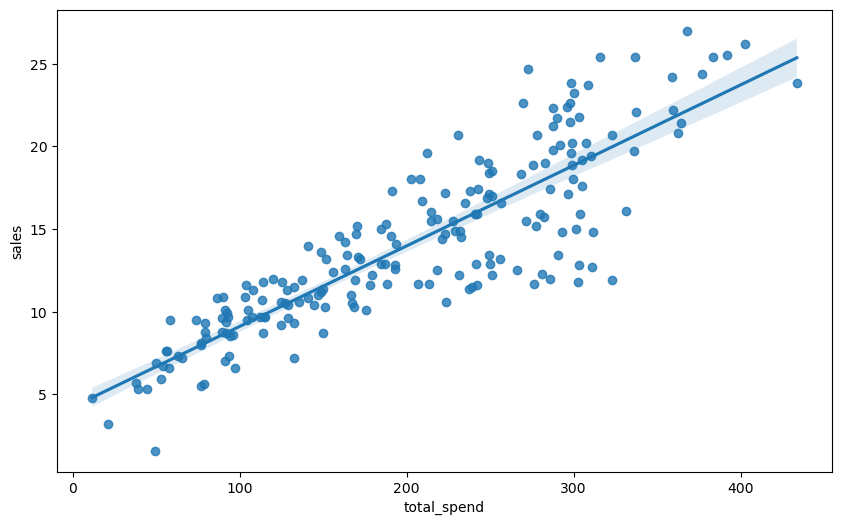

In [24]:
sns.regplot(x='total_spend', y='sales', data=df)

# Spliting the dataset into X (independent variables) and y (dependent variables) 

y = b1 * X + b0
### y = label = target variable = dependent variable
### b1 = slope -∞ < 0 < +∞
### X = observation/feature, independent variable
### b0 =  intercept /the beginning parameter -∞ < 0 < +∞

In [25]:
X = df['total_spend']
y = df['sales']

y_pred = b1X + b0

b1 = total_spend x's coefficient

b0 = the value of y when x is zero

In [26]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [27]:
b1, b0 = np.polyfit(X,y,deg=1)

In [28]:
print(f'y = {b0:.2f} + {b1:.3f}*X')

y = 4.24 + 0.049*X


In [29]:
y_pred = b0 + b1 * X
y_pred

0      20.655712
1      10.518896
2      10.689303
3      16.478292
4      16.414998
         ...    
195     6.954943
196     9.462369
197    13.625183
198    23.318939
199    16.385785
Name: total_spend, Length: 200, dtype: float64

In [30]:
df['y_pred'] = y_pred

In [31]:
df['error']=y - df.y_pred

In [32]:
df.error

0      1.444288
1     -0.118896
2     -1.389303
3      2.021708
4     -3.514998
         ...   
195    0.645057
196    0.237631
197   -0.825183
198    2.181061
199   -2.985785
Name: error, Length: 200, dtype: float64

In [33]:
df['LSE']=df.error **2
df

,total_spend,sales,y_pred,error,LSE
0,337.1,22.1,20.655712,1.444288,2.085967
1,128.9,10.4,10.518896,-0.118896,0.014136
2,132.4,9.3,10.689303,-1.389303,1.930164
3,251.3,18.5,16.478292,2.021708,4.087302
4,250.0,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...,...
195,55.7,7.6,6.954943,0.645057,0.416098
196,107.2,9.7,9.462369,0.237631,0.056469
197,192.7,12.8,13.625183,-0.825183,0.680926
198,391.8,25.5,23.318939,2.181061,4.757026


In [36]:
df.error.sum().round()

-0.0

In [35]:
df.LSE.sum()

1338.4439761715594

## Determination of coefficients (slopes and intercept)

actual value           = y

predicted value        = y_pred

residual               = y - y_pred      = difference between actual value and predicted value (errors)

LSE (Least Square Eror) = (y - y_pred)^2  = square of the difference between actual value and predicted value = Least squares

In [42]:
sample_spend = np.linspace(0,500,100)
sample_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

# Prediction with simple linear regression

# How can we improve our predictions? 

y = b1 * x + b0  => simple linear

y = a1 * x**3 + a2 * x**2 + a3*x + a0 => 3 degree polynomial

WE CAN IMPROVE THE PREDICTION MODEL BY INCREASING THE POLYNOMIAL DEGREE (Model Complexity)

In [38]:
a = np.polyfit(X,y, deg=3)
a

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [39]:
a1,a2,a3,a0 = np.polyfit(X,y, deg=3)

In [41]:
a0

2.704950525950053

If the output is [a, b, c, d], this indicates that the best-fitting polynomial found is y = aX^3 + bX^2 + c*X + d.

In [49]:
pred_lin = b1 * X + b0
pred_poly3 = a1 * X ** 3 + a2 * X ** 2 + a3 * X + a0
print(pred_lin, pred_poly3)

0      20.655712
1      10.518896
2      10.689303
3      16.478292
4      16.414998
         ...    
195     6.954943
196     9.462369
197    13.625183
198    23.318939
199    16.385785
Name: total_spend, Length: 200, dtype: float64 0      20.638908
1      10.798199
2      10.967437
3      16.255227
4      16.196565
         ...    
195     6.742858
196     9.707343
197    13.691830
198    24.295404
199    16.169538
Name: total_spend, Length: 200, dtype: float64


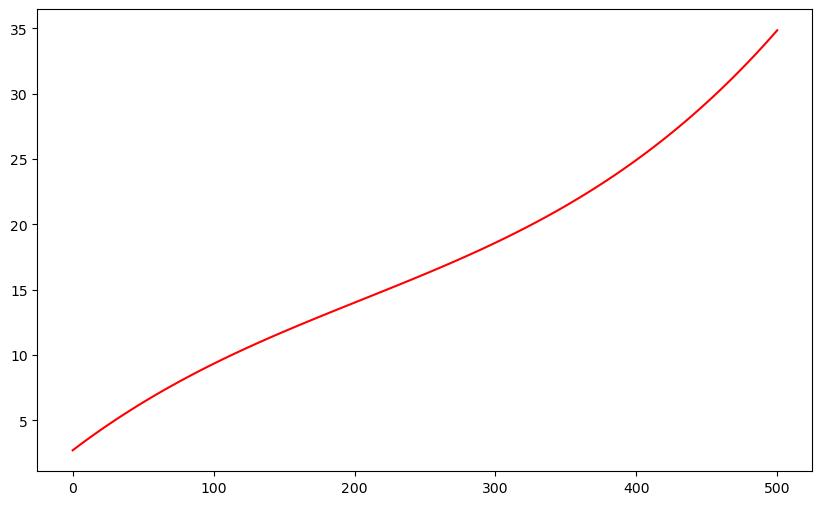

In [48]:
plt.plot(sample_spend, pred_spend_poly3,color='red')

In [50]:
fordf = {"actual": y, "predicted":pred_poly3, "residual": y - pred_poly3, "LSE":(y - pred_poly3) ** 2}
df_poly3 = pd.DataFrame(fordf)
df_poly3

,actual,predicted,residual,LSE
0,22.1,20.638908,1.461092,2.134791
1,10.4,10.798199,-0.398199,0.158562
2,9.3,10.967437,-1.667437,2.780346
3,18.5,16.255227,2.244773,5.039007
4,12.9,16.196565,-3.296565,10.867340
...,...,...,...,...
195,7.6,6.742858,0.857142,0.734693
196,9.7,9.707343,-0.007343,0.000054
197,12.8,13.691830,-0.891830,0.795361
198,25.5,24.295404,1.204596,1.451051


In [51]:
c = np.polyfit(X,y,deg=12)
c

array([ 5.40320175e-26, -1.29116261e-22,  1.34473661e-19, -8.02675255e-17,
        3.04157961e-14, -7.67745078e-12,  1.32452498e-09, -1.59090901e-07,
        1.35599742e-05, -8.27149738e-04,  3.42028995e-02, -7.29263392e-01,
        9.56417630e+00])

In [54]:
c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c0 = np.polyfit(X,y,deg=12)

In [55]:
pred_poly12 = c1 * X**12 + c2*X**11 + c3*X**10

5.403201746696243e-26